### Pandas Dataframe of three different Relevant data sources:
#### 1. List of Bills
#### 2. List of Legislators
#### 3. List of Sponsors

In [1]:
# Function to read files as pandas
import pandas
def filereader(file):
    file = pandas.read_csv(file, encoding = 'utf-8', sep = ',')
    return file

#Funct to read files as lists
def listreader(file):
    with open (file, 'r', encoding = 'utf-8') as f:
        header = f.readline().strip().split(',')
        data = [line.strip().split(',') for line in f.readlines()]
    return data

bills1718 = filereader('data/CA1718/bills.csv')
people1718 = filereader('data/CA1718/people.csv')
sponsors1718 = filereader('data/CA1718/sponsors.csv')
sponsorslist1718 = listreader('data/CA1718/sponsors.csv')

bills1516 = filereader('data/CA1516/bills.csv')
people1516 = filereader('data/CA1516/people.csv')
sponsors1516 = filereader('data/CA1516/sponsors.csv')
sponsorslist1516 = listreader('data/CA1516/sponsors.csv')

bills1314 = filereader('data/CA1314/bills.csv')
people1314 = filereader('data/CA1314/people.csv')
sponsors1314 = filereader('data/CA1314/sponsors.csv')
sponsorslist1314 = listreader('data/CA1314/sponsors.csv')

bills1112 = filereader('data/CA1112/bills.csv')
people1112 = filereader('data/CA1112/people.csv')
sponsors1112 = filereader('data/CA1112/sponsors.csv')
sponsorslist1112 = listreader('data/CA1112/sponsors.csv')

bills0910 = filereader('data/CA0910/bills.csv')
people0910 = filereader('data/CA0910/people.csv')
sponsors0910 = filereader('data/CA0910/sponsors.csv')
sponsorslist0910 = listreader('data/CA0910/sponsors.csv')

In [2]:
# Function to create dictionary of two items
def dictcreator(input1, input2):
    newdict = dict(zip(input1, input2))
    return newdict
peopledict1718 = dictcreator(people1718['name'], people1718['people_id'])
peopledict1516 = dictcreator(people1516['name'], people1516['people_id'])
peopledict1314 = dictcreator(people1314['name'], people1314['people_id'])
peopledict1112 = dictcreator(people1112['name'], people1112['people_id'])
peopledict0910 = dictcreator(people0910['name'], people0910['people_id'])

# Function to convert dictionaries to lists
def dicttolist(inputdict):
    newlist = []
    for key, value in inputdict.items():
        newlist.append([key,value])
    return newlist
peoplelist1718 = dicttolist(peopledict1718)
peoplelist1516 = dicttolist(peopledict1516)
peoplelist1314 = dicttolist(peopledict1314)
peoplelist1112 = dicttolist(peopledict1112)
peoplelist0910 = dicttolist(peopledict0910)

# Function to convert dictionary to dataframe
def dfconverter(inputlist, colname1, colname2):
    newdf = pandas.DataFrame(inputlist, columns=(colname1, colname2))
    return newdf
peopledf1718 = dfconverter(peoplelist1718, 'name', 'pid')
peopledf1516 = dfconverter(peoplelist1516, 'name', 'pid')
peopledf1314 = dfconverter(peoplelist1314, 'name', 'pid')
peopledf1112 = dfconverter(peoplelist1112, 'name', 'pid')
peopledf0910 = dfconverter(peoplelist0910, 'name', 'pid')


In [3]:
# Function to match sponsors list with list of legislators - returns a list and a pandas dataframe.
def matcher(list1, list2):
    for items in list1:
        for name, pid in list2:
            if int(items[1]) == int(pid):
                items.append(name)
    return list1, pandas.DataFrame(list1, columns=('bill','pid','position','sponsor'))
sponsoredlist1718, sponsoreddf1718 = matcher(sponsorslist1718, peoplelist1718)
sponsoredlist1516, sponsoreddf1516 = matcher(sponsorslist1516, peoplelist1516)
sponsoredlist1314, sponsoreddf1314 = matcher(sponsorslist1314, peoplelist1314)
sponsoredlist1112, sponsoreddf1112 = matcher(sponsorslist1112, peoplelist1112)
sponsoredlist0910, sponsoreddf0910 = matcher(sponsorslist0910, peoplelist0910)

In [4]:
#function to create an edgelist - Takes a very long time
def edges(list1, list2):
    edgelist = []
    edgedict = {}
    for bills in list1:
        for names in list2:
            try:
                if bills[0] == names[0]:
                    if bills[3] != 0:
                        if bills[3] != names[3]:
                            edgelist.append([bills[3], names[3]])
                            edgedict[bills[3]] = names[3]
            except:
                continue 
    return edgelist, edgedict

edgelist1718, edgedict1718 = edges(sponsoredlist1718, sponsoredlist1718)
edgelist1516, edgedict1516 = edges(sponsoredlist1516, sponsoredlist1516)
edgelist1314, edgedict1314 = edges(sponsoredlist1314, sponsoredlist1314)
edgelist1112, edgedict1112 = edges(sponsoredlist1112, sponsoredlist1112)
edgelist0910, edgedict0910 = edges(sponsoredlist0910, sponsoredlist0910)

In [5]:
edgedf1718 = pandas.DataFrame(edgelist1718, columns=('source','target'))
edgedf1516 = pandas.DataFrame(edgelist1516, columns=('source','target'))
edgedf1314 = pandas.DataFrame(edgelist1314, columns=('source','target'))
edgedf1112 = pandas.DataFrame(edgelist1112, columns=('source','target'))
edgedf0910 = pandas.DataFrame(edgelist0910, columns=('source','target'))

In [6]:
# Code to weight edges
import collections
edgetuple1718 = tuple(tuple(x) for x in edgelist1718)
edgetuple1516 = tuple(tuple(x) for x in edgelist1516)
edgetuple1314 = tuple(tuple(x) for x in edgelist1314)
edgetuple1112 = tuple(tuple(x) for x in edgelist1112)
edgetuple0910 = tuple(tuple(x) for x in edgelist0910)

weightededges1718 = list(collections.Counter(edgetuple1718).items())
weightededges1516 = list(collections.Counter(edgetuple1516).items())
weightededges1314 = list(collections.Counter(edgetuple1314).items())
weightededges1112 = list(collections.Counter(edgetuple1112).items())
weightededges0910 = list(collections.Counter(edgetuple0910).items())


params1718 = list((x, y, int(v)) for (x,y), v in weightededges1718)
params1516 = list((x, y, int(v)) for (x,y), v in weightededges1516)
params1314 = list((x, y, int(v)) for (x,y), v in weightededges1314)
params1112 = list((x, y, int(v)) for (x,y), v in weightededges1112)
params0910 = list((x, y, int(v)) for (x,y), v in weightededges0910)

In [7]:
import networkx as nx

In [8]:
# Network stuff
G1718 = nx.Graph()
G1516 = nx.Graph()
G1314 = nx.Graph()
G1112 = nx.Graph()
G0910 = nx.Graph()

node_names1718 = [n[0] for n in peoplelist1718]
node_names1516 = [n[0] for n in peoplelist1516]
node_names1314 = [n[0] for n in peoplelist1314]
node_names1112 = [n[0] for n in peoplelist1112]
node_names0910 = [n[0] for n in peoplelist0910]

G1718.add_nodes_from(node_names1718)
G1516.add_nodes_from(node_names1516)
G1314.add_nodes_from(node_names1314)
G1112.add_nodes_from(node_names1112)
G0910.add_nodes_from(node_names0910)


G1718.add_weighted_edges_from(params1718)
G1516.add_weighted_edges_from(params1516)
G1314.add_weighted_edges_from(params1314)
G1112.add_weighted_edges_from(params1112)
G0910.add_weighted_edges_from(params0910)

G1718.remove_nodes_from(list(nx.isolates(G1718)))
G1516.remove_nodes_from(list(nx.isolates(G1516)))
G1314.remove_nodes_from(list(nx.isolates(G1314)))
G1112.remove_nodes_from(list(nx.isolates(G1112)))
G0910.remove_nodes_from(list(nx.isolates(G0910)))

In [9]:
# Network Stuff Part 2
G1718info = nx.info(G1718)
G1516info = nx.info(G1516)
G1314info = nx.info(G1314)
G1112info = nx.info(G1112)
G0910info = nx.info(G0910)

In [10]:
G1718betweencentrality = nx.algorithms.betweenness_centrality(G1718)
G1516betweencentrality = nx.algorithms.betweenness_centrality(G1516)
G1314betweencentrality = nx.algorithms.betweenness_centrality(G1314)
G1112betweencentrality = nx.algorithms.betweenness_centrality(G1112)
G0910betweencentrality = nx.algorithms.betweenness_centrality(G0910)

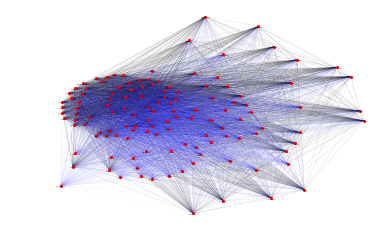

In [17]:
import matplotlib.pyplot as plt
elarge1718 = [(u, v) for (u, v, d) in G1718.edges(data=True) if d['weight'] > 200]
esmall1718 = [(u, v) for (u, v, d) in G1718.edges(data=True) if d['weight'] <= 199]
pos = nx.kamada_kawai_layout(G1718)
nx.draw_networkx_nodes(G1718, pos, node_size=4)
nx.draw_networkx_edges(G1718, pos, edgelist=elarge1718,width=.05)
nx.draw_networkx_edges(G1718, pos, edgelist=esmall1718,width=.05, alpha=0.5, edge_color='b', style='dashed')
nx.draw_networkx_labels(G1718, pos, font_size=.01, font_family='sans-serif')

plt.axis('off')
plt.show()

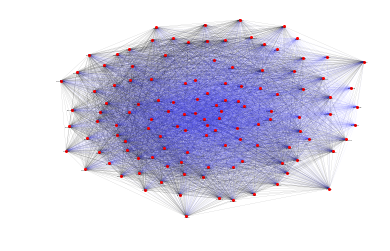

In [13]:
elarge1516 = [(u, v) for (u, v, d) in G1516.edges(data=True) if d['weight'] > 200]
esmall1516 = [(u, v) for (u, v, d) in G1516.edges(data=True) if d['weight'] <= 199]
pos = nx.kamada_kawai_layout(G1516)
nx.draw_networkx_nodes(G1516, pos, node_size=4)
nx.draw_networkx_edges(G1516, pos, edgelist=elarge1516,width=.05)
nx.draw_networkx_edges(G1516, pos, edgelist=esmall1516,width=.05, alpha=0.5, edge_color='b', style='dashed')
nx.draw_networkx_labels(G1516, pos, font_size=.01, font_family='sans-serif')

plt.axis('off')
plt.show()

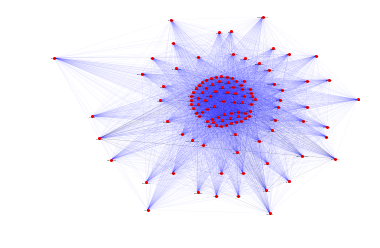

In [14]:
elarge1314 = [(u, v) for (u, v, d) in G1314.edges(data=True) if d['weight'] > 200]
esmall1314 = [(u, v) for (u, v, d) in G1314.edges(data=True) if d['weight'] <= 199]
pos = nx.kamada_kawai_layout(G1314)
nx.draw_networkx_nodes(G1314, pos, node_size=4)
nx.draw_networkx_edges(G1314, pos, edgelist=elarge1314,width=.05)
nx.draw_networkx_edges(G1314, pos, edgelist=esmall1314,width=.05, alpha=0.5, edge_color='b', style='dashed')
nx.draw_networkx_labels(G1314, pos, font_size=.01, font_family='sans-serif')

plt.axis('off')
plt.show()

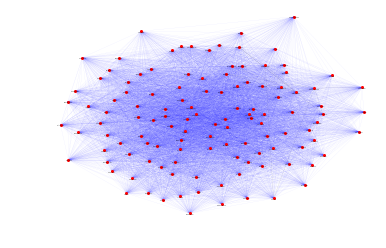

In [15]:
elarge1112 = [(u, v) for (u, v, d) in G1112.edges(data=True) if d['weight'] > 200]
esmall1112 = [(u, v) for (u, v, d) in G1112.edges(data=True) if d['weight'] <= 199]
pos = nx.kamada_kawai_layout(G1112)
nx.draw_networkx_nodes(G1112, pos, node_size=4)
nx.draw_networkx_edges(G1112, pos, edgelist=elarge1112,width=.05)
nx.draw_networkx_edges(G1112, pos, edgelist=esmall1112,width=.05, alpha=0.5, edge_color='b', style='dashed')
nx.draw_networkx_labels(G1112, pos, font_size=.01, font_family='sans-serif')

plt.axis('off')
plt.show()

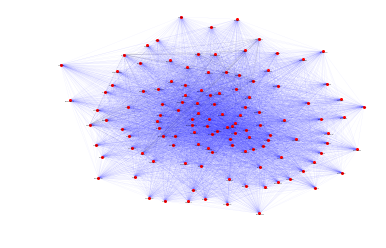

In [16]:
elarge0910 = [(u, v) for (u, v, d) in G0910.edges(data=True) if d['weight'] > 200]
esmall0910 = [(u, v) for (u, v, d) in G0910.edges(data=True) if d['weight'] <= 199]
pos = nx.kamada_kawai_layout(G0910)
nx.draw_networkx_nodes(G0910, pos, node_size=4)
nx.draw_networkx_edges(G0910, pos, edgelist=elarge0910,width=.05)
nx.draw_networkx_edges(G0910, pos, edgelist=esmall0910,width=.05, alpha=0.5, edge_color='b', style='dashed')
nx.draw_networkx_labels(G0910, pos, font_size=.01, font_family='sans-serif')

plt.axis('off')
plt.show()